In [2]:
import pandas as pd
df=pd.read_csv('startup_funding.csv')
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


## Qs . types of startups getting funded , important investors, fields that getting lots of funding these days

In [ ]:
Load the dataset and clean any necessary data, especially NaN values in the relevant columns.
Analyze the types of startups getting funded by grouping the data by IndustryVertical and counting the occurrences.
Find the most important investors by counting the frequency of each InvestorsName.
Analyze fields getting the most funding by grouping data by IndustryVertical and summing up the AmountInUSD

* pd. and df.
  
Use pd. for general pandas functions that need data input.

Use df. (or object name) for methods that directly modify or work on that specific object

1. Calling functions with pd.: 
You use pd. when calling general pandas functions or utilities, such as pd.read_csv(), pd.to_datetime(), etc.

2. Calling Functions with df.:
df. refers to an object (in this case, a DataFrame). Functions like df.groupby() are methods that belong to the DataFrame object.
When you use df., you are calling a method that acts directly on the DataFrame df.

In [12]:
df['AmountInUSD']=df['AmountInUSD'].astype(str).str.replace(',','',regex=True) 

'''If you need to match patterns like removing multiple different characters or sequences.
Example: Removing both commas and periods from a string:
The [,.] pattern matches both commas and periods, and regex=True allows this pattern to work. Without regex=True, this would not work as expected.
'''

df['AmountInUSD']=pd.to_numeric(df['AmountInUSD'],errors='coerce')

'''Normally, values like '1300000' and '500000' can be easily converted to numbers.
But the values 'N/A' and 'unknown' are strings and cannot be directly converted to numbers.
Using errors='coerce', pandas will convert the valid values to numbers and the invalid values to NaN.

After pd.to_numeric with errors='coerce':
1300000, 500000, NaN, NaN, 200000
'''


##.astype(str): You cannot perform string operations like .replace() directly on numerical data, so you first convert the data to strings using astype(str).
##.str.replace(): Once the data is in string format, you can use the .str.replace() function to remove commas from the numbers.


## 1.  startups getting funded in last year 2017
df['Date']=pd.to_datetime(df['Date'],dayfirst=True,errors='coerce')
df_2017=df[df['Date'].dt.year==2017]
startups_funded = df_2017['IndustryVertical'].value_counts().reset_index(name='Count')  

                                                ##groupby(['IndustryVertical']).size()
                                                ## groupby sort according to index that is (mentioned column ,for making groups) , it sort index in ascending order
                                                ## but .value_counts() sort on the basis fo values (total repetition in a clumn ) , it sort in desc order

""".size():
This counts the number of rows in each group. It returns a series where the index is IndustryVertical and the values represent the number of startups for each vertical.
.reset_index(name='Count'):
After using .size(), the result is a Series with the IndustryVertical as the index.
reset_index() converts the index back into a regular column. By using reset_index(name='Count'), it names the newly created column from .size() as Count.
"""
startups_funded = startups_funded.sort_values(by='Count', ascending=False)
print('startups getting funded:\n',startups_funded)

## 2. 
important_investors = df['InvestorsName'].value_counts().head(15)
print('important investors:\n\n',important_investors)

## 3.
fields_funding = df.groupby('IndustryVertical')['AmountInUSD'].sum().reset_index()
fields_funding = fields_funding.sort_values(by='AmountInUSD', ascending=False).reset_index(drop=True)
print('\nfields getting lots of funding:\n',fields_funding)

startups getting funded:
      IndustryVertical  Count
0   Consumer Internet    233
1          Technology    123
2           eCommerce     45
3           ECommerce     15
4           Logistics      8
5          Healthcare      8
6     Food & Beverage      4
7             Finance      2
8    Food & Beverages      2
9              Others      1
10          Education      1
11          ecommerce      1
important investors:

 InvestorsName
Undisclosed Investors       33
Undisclosed investors       27
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
Brand Capital               10
Undisclosed Investor        10
RoundGlass Partners         10
Undisclosed                  9
Undisclosed investor         9
Accel Partners               9
SAIF Partners                9
Name: count, dtype: int64

fields getting lots of funding:
                           IndustryV

In [13]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN
1,1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN
4,4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN


## Qs. 2 - Number of Fundings per year

Year
2015    931
2016    993
2017    443
dtype: int64


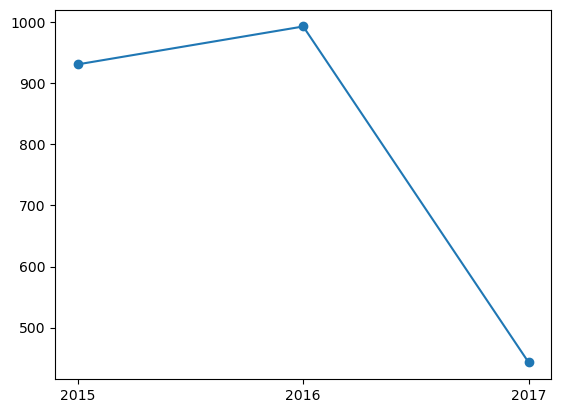

In [23]:
import matplotlib.pyplot as plt

df['Year']=pd.to_datetime(df['Date'],dayfirst=True).dt.year    ## .astype(int),,== showing na erroe
df = df.dropna(subset=['Year'])
# Convert Year to int
df['Year'] = df['Year'].astype(int)

year_wise_funding=df.groupby('Year').size()
print(year_wise_funding)
plt.scatter(year_wise_funding.index,year_wise_funding.values)
plt.plot(year_wise_funding.index,year_wise_funding.values)
plt.xticks(year_wise_funding.index)
plt.show()